# Logistic regression

# Context
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its 
liability customers to personal loan customers (while retaining them as depositors).
A campaign that the bank ran last year for liability customers showed a healthy conversion rate
of over 9% success. This has encouraged the retail marketing department to devise campaigns with 
better target marketing to increase the success ratio with a minimal budget. 

# Objective
The classification goal is to predict the likelihood of a liability customer buying personal loans

# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# importing seaborn for statistical plots
import seaborn as sns

# logistic Regression model import to model data
from sklearn.linear_model import LogisticRegression

# To break the X and y dataframes into training set and test set, we will use
# Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

import os,sys

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Load data
loan_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
#Print header of the file
loan_df.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0


   #  Checking of  data and records 


In [5]:
loan_df.shape
# gives number of rows and columns

(5000, 14)

In [6]:
loan_df.info()
# gives data types of all attributes
#This implies all attributes have numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


 Attribute Information
    - 6 numeric variables: 'ID', 'Age', 'Experience', 'Income', 'ZIP Code','CCAvg',   
    - 2 numerical variables but like categorical variables: 'Family', 'Education'
    - 5 Boolean variables: 'Securities Account', 'CD Account', 'Online', 'CreditCard'

In [7]:
loan_df.isnull().sum()
#It implies there are no null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
loan_df.describe().transpose()
# gives statistical summary

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


In [9]:
# Skew Analysis is done to check for skewness
loan_df.skew(axis=0)

ID                     0.00
Age                   -0.03
Experience            -0.03
Income                 0.84
ZIP Code             -12.50
Family                 0.16
CCAvg                  1.60
Education              0.23
Mortgage               2.10
Personal Loan          2.74
Securities Account     2.59
CD Account             3.69
Online                -0.39
CreditCard             0.90
dtype: float64

We can observe that Skewness is more for ZIP Code

# Check for Invalid Data

In [10]:
# Checking for invalid data
# Min and Max can also be seen under Describe() also
for i in list(loan_df.columns):
    print('{}--> Maximum : {}\t &\t Minimum : {}'.format(i.ljust(18),max(loan_df[i]), min(loan_df[i])))

# here we can observe that Experience has negative values also which can not be possible 

ID                --> Maximum : 5000	 &	 Minimum : 1
Age               --> Maximum : 67	 &	 Minimum : 23
Experience        --> Maximum : 43	 &	 Minimum : -3
Income            --> Maximum : 224	 &	 Minimum : 8
ZIP Code          --> Maximum : 96651	 &	 Minimum : 9307
Family            --> Maximum : 4	 &	 Minimum : 1
CCAvg             --> Maximum : 10.0	 &	 Minimum : 0.0
Education         --> Maximum : 3	 &	 Minimum : 1
Mortgage          --> Maximum : 635	 &	 Minimum : 0
Personal Loan     --> Maximum : 1	 &	 Minimum : 0
Securities Account--> Maximum : 1	 &	 Minimum : 0
CD Account        --> Maximum : 1	 &	 Minimum : 0
Online            --> Maximum : 1	 &	 Minimum : 0
CreditCard        --> Maximum : 1	 &	 Minimum : 0


In [11]:
print('Total number of records of invalid Experience :',len(loan_df[loan_df['Experience']<0]))
loan_df[loan_df['Experience']<0]
# There are many people whose experience is < 0. Hence it must be imputed.

Total number of records of invalid Experience : 52


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [12]:
# Imputation for inappropriate Values
# As observed people with negative Experience are of Age <30.
# Hence imputing to positive as mode/ mean of Experience will not be suitable to impute and can be considered as wrong entry

from sklearn.impute import SimpleImputer
wrong_Exp=(-1,-2,-3)
for i in wrong_Exp:
    rep_0= SimpleImputer(missing_values= i, strategy= 'constant', fill_value= -i)
    cols=['Experience']
    imputer= rep_0.fit(loan_df[cols])
    loan_df[cols]= imputer.transform(loan_df[cols])


In [13]:
# Checking for data if there are records where Experience is more than Age which is not possible
loan_df[(loan_df['Experience']> loan_df['Age'])]

# this implies records are correct in relation to Experience and Age

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


# 2. EDA

In [14]:
#Number of Unique in each column
cols= loan_df.columns
for i in cols:
    print('Unique Numbers in {} > {} '.format(i.ljust(20,'-'),len(loan_df[i].unique())))

Unique Numbers in ID------------------ > 5000 
Unique Numbers in Age----------------- > 45 
Unique Numbers in Experience---------- > 44 
Unique Numbers in Income-------------- > 162 
Unique Numbers in ZIP Code------------ > 467 
Unique Numbers in Family-------------- > 4 
Unique Numbers in CCAvg--------------- > 108 
Unique Numbers in Education----------- > 3 
Unique Numbers in Mortgage------------ > 347 
Unique Numbers in Personal Loan------- > 2 
Unique Numbers in Securities Account-- > 2 
Unique Numbers in CD Account---------- > 2 
Unique Numbers in Online-------------- > 2 
Unique Numbers in CreditCard---------- > 2 


In [15]:
# ID is unique so it can be removed from dataframe
loan_df.drop(columns=['ID'], axis=1, inplace=True)
loan_df.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0


In [16]:
# Number of people with Zero Mortgage
print("Number of People with zero Mortgage--->" , len(loan_df[loan_df.Mortgage==0]))

Number of People with zero Mortgage---> 3462


In [17]:
print('No.of People not having Credit Card and Spending are--> {}'.format(len(loan_df[(loan_df['CCAvg'] >0) & (loan_df['CreditCard']==0)])))

No.of People not having Credit Card and Spending are--> 3452


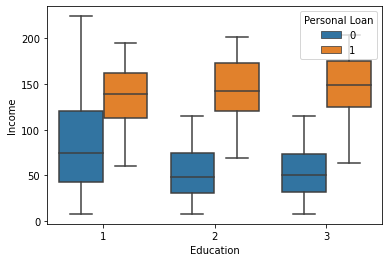

In [18]:
# Relatioship between Income, Education and Personal Loan

sns.boxplot(x='Education',y='Income',hue='Personal Loan' ,data= loan_df)

# There are high number of Undergraduates having more income comparative to Graduate and Professional
# Loan taking customers have nearly same income group


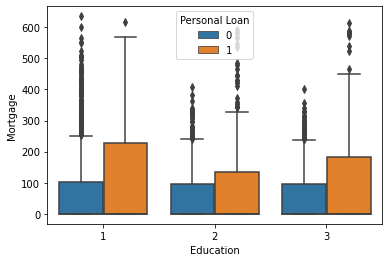

In [19]:
# Relationship between Mortgage,Education and Personal Loan 
sns.boxplot(x="Education", y='Mortgage',hue="Personal Loan",data=loan_df)

# Loan accepted Customers have high Mortgage in comparison to non loan accepted

In [20]:
# Value Counts in Categorical Column .
loan_df=pd.get_dummies(loan_df,columns=['Education'])
loan_df.iloc[:,-3:].sum(axis=0)

Education_1    2096
Education_2    1403
Education_3    1501
dtype: int64

In [21]:
loan_df.rename(columns={'Education_1' : 'UnderGrad', 
                        'Education_2' : 'Grad',
                        'Education_3' : 'Professional'}, inplace= True)

# 2. EDA

# Univariate Analysis

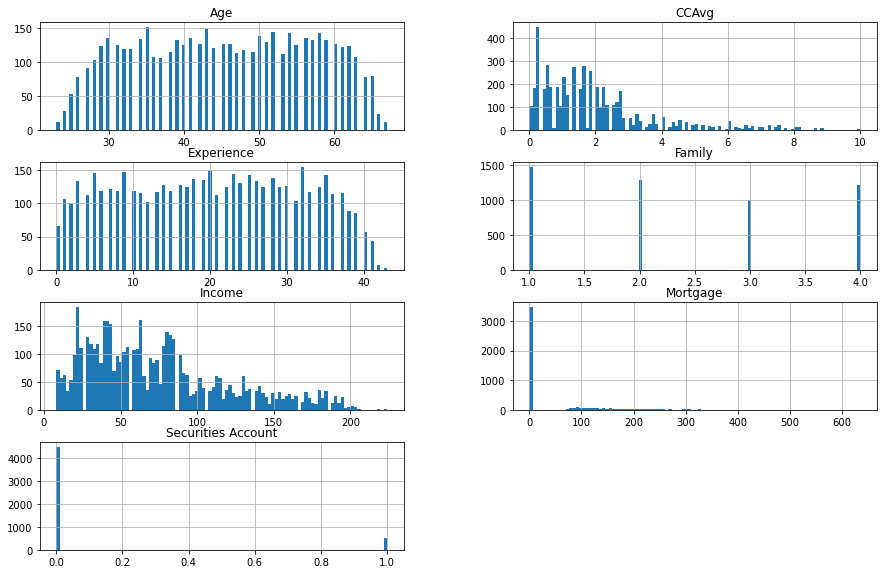

In [22]:
cols1 = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
            'Securities Account'] 
loan_df[cols1].hist(stacked=False, bins=100, figsize=(15,20), layout=(8,2)); 
# Histogram of 7 columns

# Above Histogram Analysis
- Different Aged customer seems to unifromly distributed.
- There are less no of customer whose CCAvg(Expenditure) more than 3 are less
- There are customer with 0 years of Experience till 40 years of Experience
- There are more number of customer having no Mortgage and few cutomer having mortgage 
  between 200 to 400
- There are more number of customer having no Securities Account
- There are more no of customer having Avergae income. Higher income Customer are less.
- Higher spending on Credit card customers are less

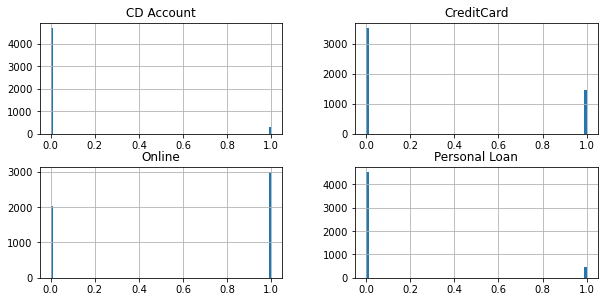

In [23]:
cols2 = ['CD Account', 'Online', 'CreditCard','Personal Loan'] 
loan_df[cols2].hist(stacked=False, bins=80, figsize=(10,10), layout=(4,2)); 
# Histogram of 4 columns

# Above Histogram Analysis

- There are more no of customer having no Certificate of Deposit Account.
- Less no of customer holds Credit Card
- Customers using Online Feature are moreover same
- There are very less number of Customer who availed Loan


In [24]:
education=['UnderGrad', 'Grad', 'Professional']
for i in education:   # checking value counts of splitted education column 
    print(loan_df[i].value_counts())
    print()
    
#- There are more number of Undergraduates and aproximately same number of Graduates and Professional

0    2904
1    2096
Name: UnderGrad, dtype: int64

0    3597
1    1403
Name: Grad, dtype: int64

0    3499
1    1501
Name: Professional, dtype: int64



 Number of customer accepted loan     : 480
 Number of customer not accepted loan : 4520
 Percentage of customer accepted loan : 9.6 %


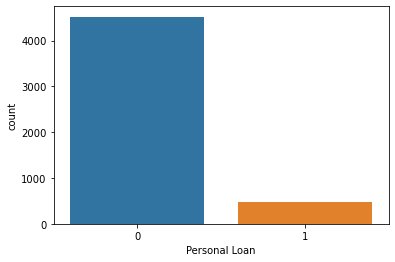

In [25]:
loan_availed= len(loan_df[loan_df['Personal Loan']==1])
loan_Navailed= len(loan_df[loan_df['Personal Loan']==0])
loan_avail_perc= (loan_availed/(loan_availed + loan_Navailed))*100
print(' Number of customer accepted loan     :', loan_availed)
print(' Number of customer not accepted loan :', loan_Navailed)
print(' Percentage of customer accepted loan :', loan_avail_perc,'%')
sns.countplot(x='Personal Loan', data=loan_df)

In [26]:
loan_df.groupby(by='Personal Loan').mean()
# avaerage age and Experience is less for customers who took loan

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,UnderGrad,Grad,Professional
Personal Loan,,,,,,,,,,,,,,
0,45.37,20.17,66.24,"93,152.43",2.37,1.73,51.79,0.10,0.04,0.60,0.29,0.44,0.27,0.29
1,45.07,19.84,144.75,"93,153.20",2.61,3.91,100.85,0.12,0.29,0.61,0.30,0.19,0.38,0.43


In [27]:
# Relationship between customer having CD account and taking loan
loan_df.groupby(['CD Account'])['Personal Loan'].value_counts()
# More no of cistomer accepting loan has no CD Account

CD Account  Personal Loan
0           0                4358
            1                 340
1           0                 162
            1                 140
Name: Personal Loan, dtype: int64

In [28]:
# Relationship between customer having Securities account and taking loan
loan_df.groupby(['Securities Account'])['Personal Loan'].value_counts()
# More no of customer accepting loan has no Securities Account

Securities Account  Personal Loan
0                   0                4058
                    1                 420
1                   0                 462
                    1                  60
Name: Personal Loan, dtype: int64

# Bivariate Analysis

In [29]:
loan_df.corr()     # Corelation

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,UnderGrad,Grad,Professional
Age,1.00,0.99,-0.06,-0.03,-0.05,-0.05,-0.01,-0.01,-0.00,0.01,0.01,0.01,-0.03,-0.02,0.05
Experience,0.99,1.00,-0.05,-0.03,-0.05,-0.05,-0.01,-0.01,-0.00,0.01,0.01,0.01,-0.00,-0.02,0.02
Income,-0.06,-0.05,1.00,-0.02,-0.16,0.65,0.21,0.50,-0.00,0.17,0.01,-0.00,0.22,-0.13,-0.11
ZIP Code,-0.03,-0.03,-0.02,1.00,0.01,-0.00,0.01,0.00,0.00,0.02,0.02,0.01,-0.00,0.04,-0.03
Family,-0.05,-0.05,-0.16,0.01,1.00,-0.11,-0.02,0.06,0.02,0.01,0.01,0.01,-0.12,0.14,-0.01
CCAvg,-0.05,-0.05,0.65,-0.00,-0.11,1.00,0.11,0.37,0.02,0.14,-0.00,-0.01,0.16,-0.09,-0.08
Mortgage,-0.01,-0.01,0.21,0.01,-0.02,0.11,1.00,0.14,-0.01,0.09,-0.01,-0.01,0.04,-0.03,-0.01
Personal Loan,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,1.00,0.02,0.32,0.01,0.00,-0.15,0.07,0.09
Securities Account,-0.00,-0.00,-0.00,0.00,0.02,0.02,-0.01,0.02,1.00,0.32,0.01,-0.02,0.01,0.01,-0.01
CD Account,0.01,0.01,0.17,0.02,0.01,0.14,0.09,0.32,0.32,1.00,0.18,0.28,-0.01,0.01,0.01


In [30]:
# Correlation in graphical representation 
def plot_corr(df, size=18):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns) 
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

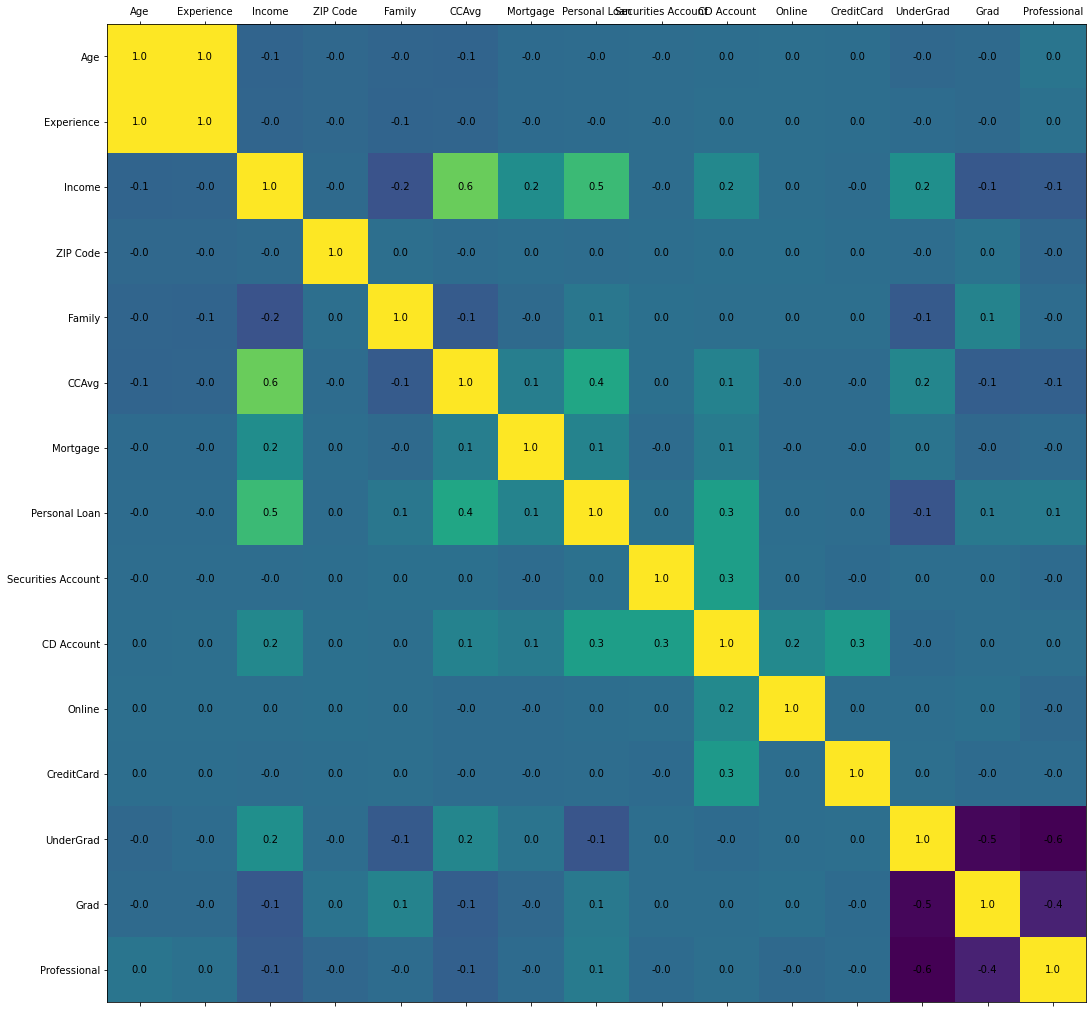

In [31]:
 plot_corr(loan_df)

# Age and Expereice are highly Corelated 

<Figure size 720x720 with 0 Axes>

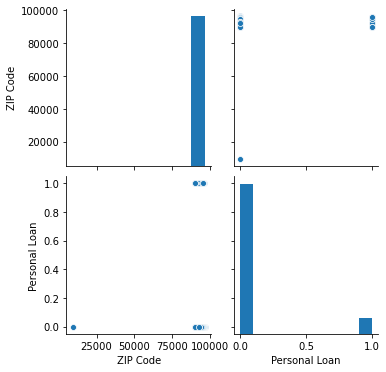

In [32]:
# Pairplot for relation between ZIP code and Customer availing Loan
cols3=['ZIP Code','Personal Loan']
fig=plt.figure(figsize=(10,10))
sns.pairplot(loan_df[cols3])
# It seems most of customer are from higher ZIP code 

<Figure size 57600x57600 with 0 Axes>

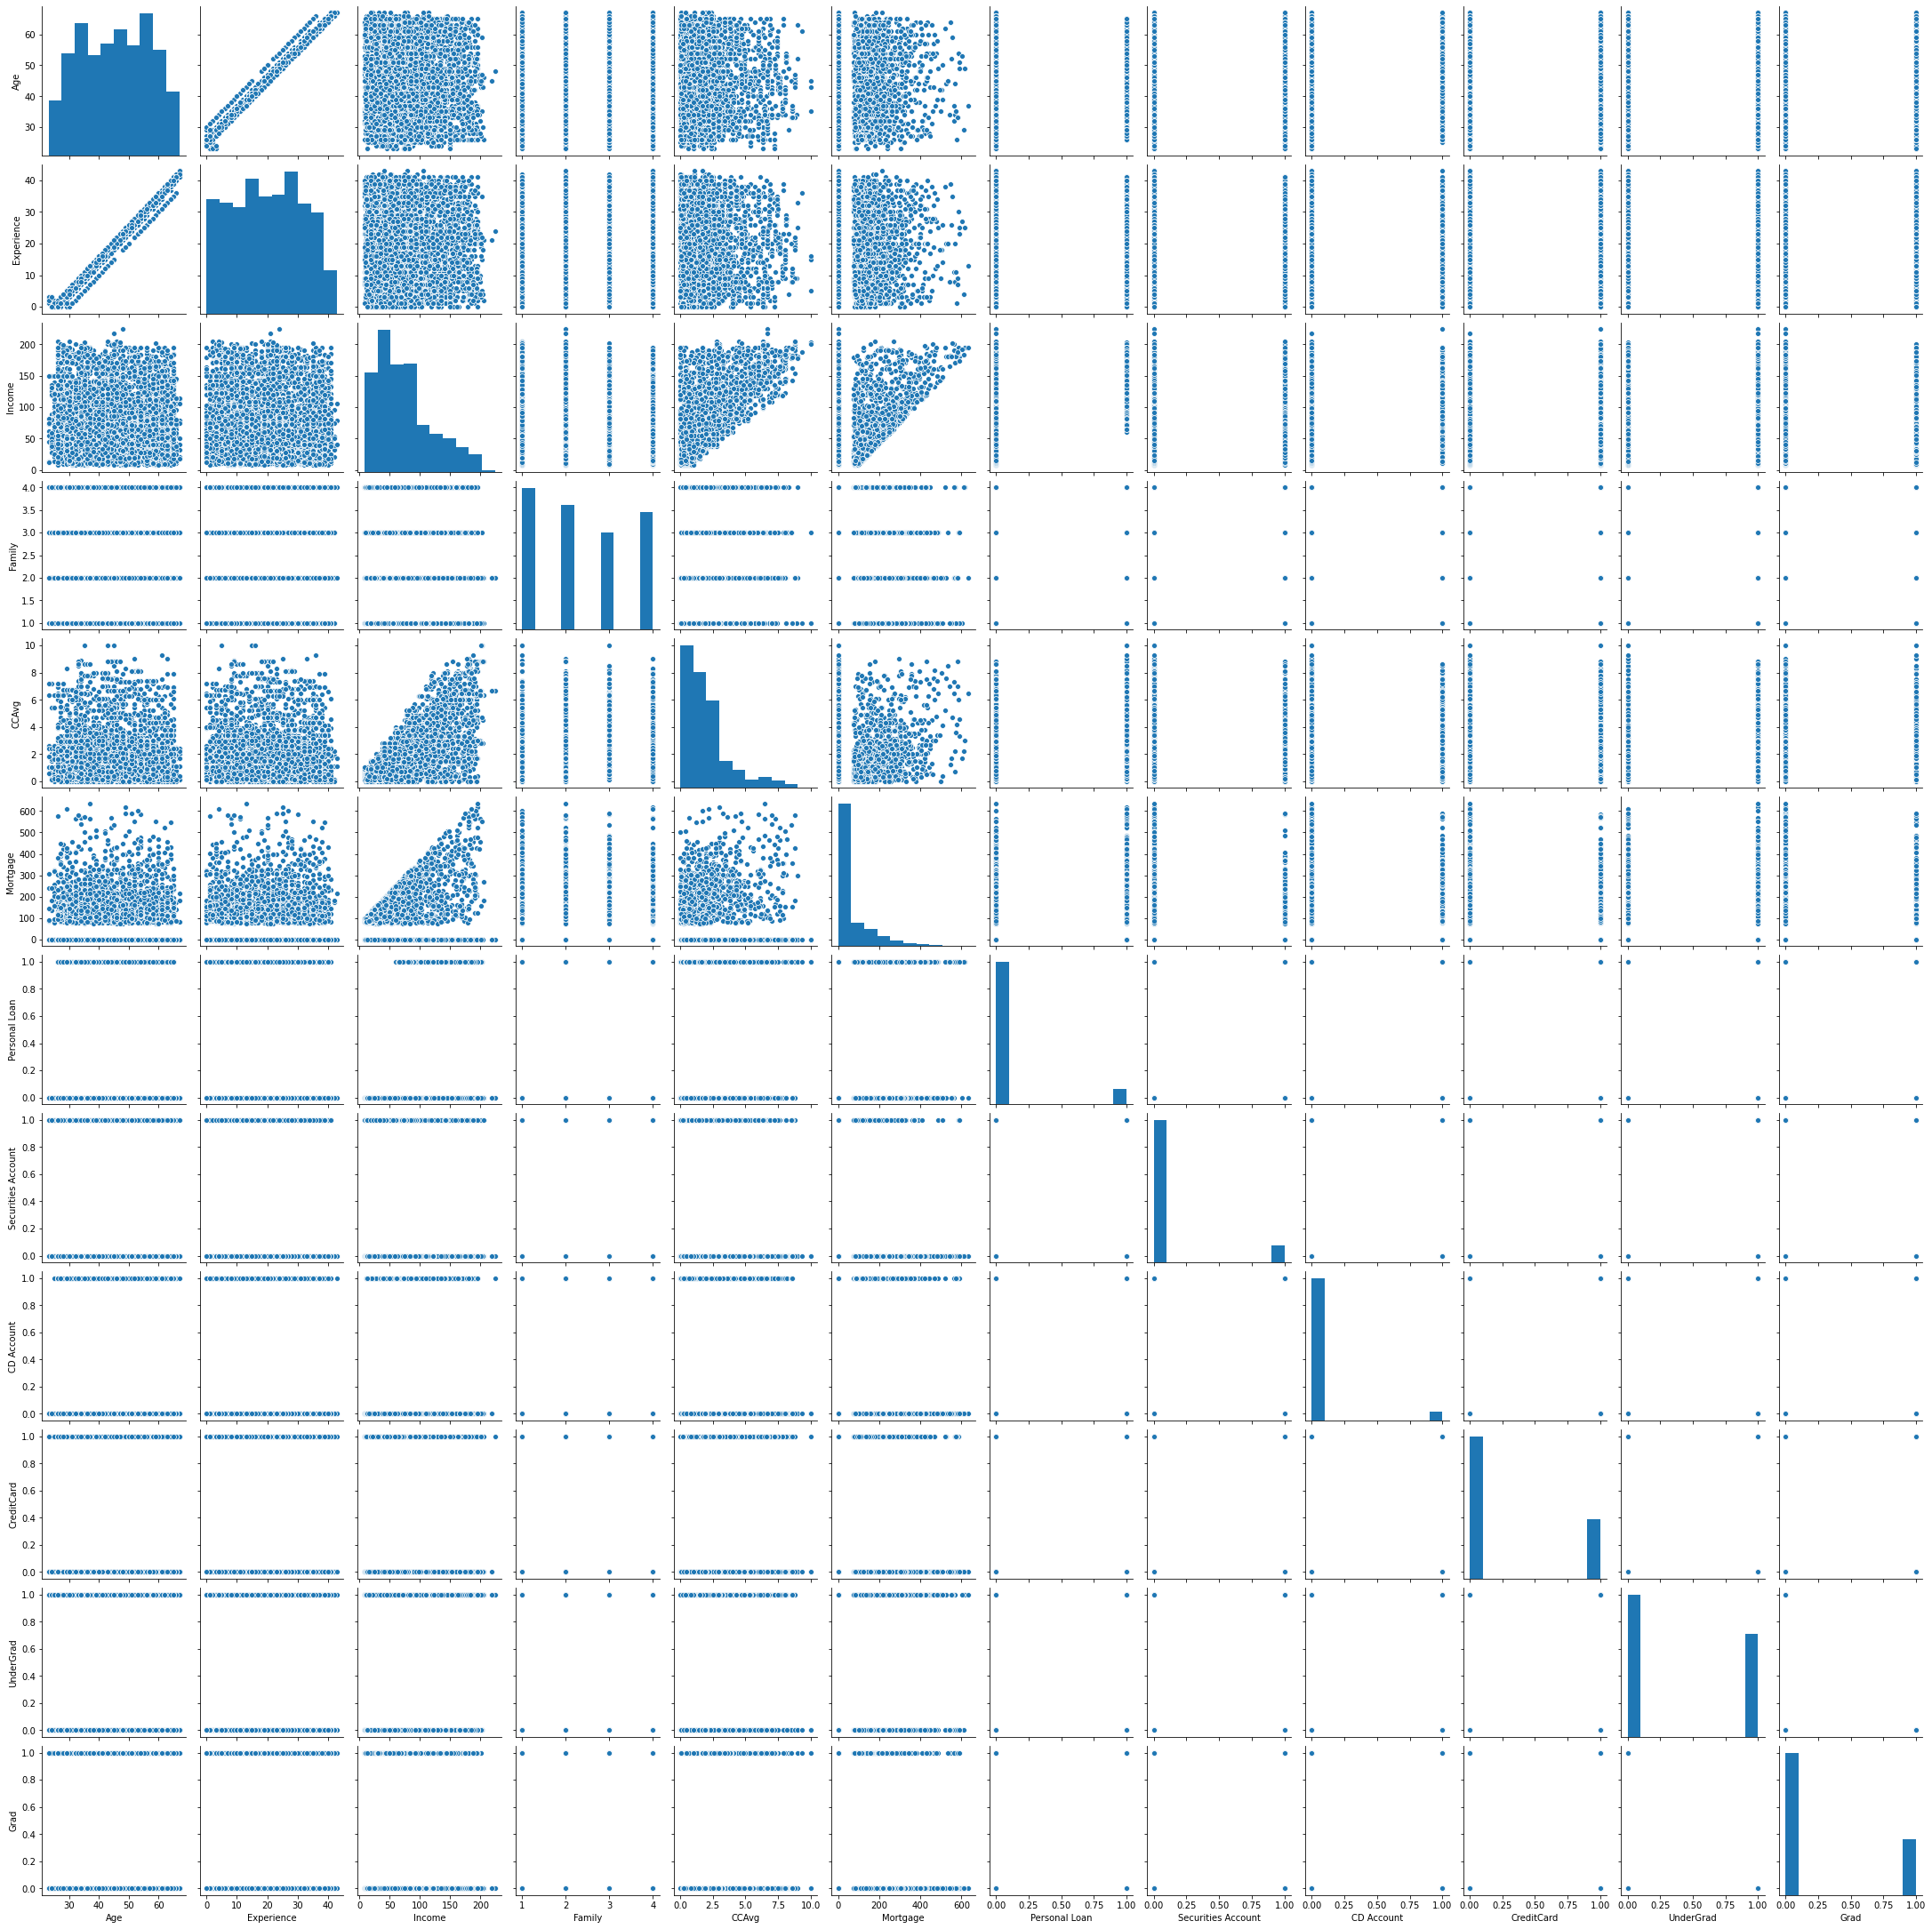

In [33]:
# Pairplot
cols4=['Age', 'Experience', 'Income','Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
        'CreditCard', 'UnderGrad', 'Grad',]
fig=plt.figure(figsize=(800,800))
sns.pairplot(loan_df[cols4])

In [34]:
# Converting Y variable as Categorical Variable
loan_df['Personal Loan'] = loan_df['Personal Loan'].astype('category')

In [35]:
# Converting Family into different size group
loan_df=pd.get_dummies(loan_df,columns=['Family'])

# Data Preparation and Splitting

In [36]:
# Dropping Experience Column as Age and Experience are linearly co-related and will not effect much.
# Dropping ZIP code as it is highly skewed and most customers are from aprox same ZIP area
# Dropping Professional from Education as one out of three category

X= loan_df.drop(columns=['Experience','ZIP Code','Professional','Personal Loan','Family_4'], axis=1)
y= loan_df['Personal Loan']

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 5 )

# 4. logistic Regression

### Model building using statsmodels.api

In [38]:
# Build Regression Model
from sklearn import metrics
import statsmodels.api as sm

logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.112622
         Iterations 9


In [39]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:                  0.6402
Time:                        23:53:50   Log-Likelihood:                -394.18
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                4.299e-292
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -7.0422      0.562    -12.521      0.000      -8.144      -5.940
Age                    0.0030      0.008      0.363      0.716      -0.013       0.019
Income              

#  pseudo r^2
pseudo R^2 is 62%

#### Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [40]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [41]:
# Filter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD Account,3.81,44.93,0.98,0.00
CCAvg,0.20,1.22,0.55,0.00
Income,0.06,1.06,0.52,0.00
Online,-0.60,0.55,0.36,0.00
Securities Account,-0.75,0.47,0.32,0.04
CreditCard,-1.08,0.34,0.25,0.00
Family_1,-1.64,0.19,0.16,0.00
Family_2,-1.92,0.15,0.13,0.00
UnderGrad,-3.87,0.02,0.02,0.00
const,-7.04,0.00,0.00,0.00


* Customers having CD account have higher probability that they will not accept loan

### Model building using Logistic Regression from Sklearn 

Using the sklearn library to build the model and make predictions

In [42]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
# or from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=5)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_predict = logreg.predict(X_test)

In [44]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ['No Accept(0)','Accept(1)'] , yticklabels = ['No Accept(0)','Accept(1)'] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy is : 0.9597142857142857

Testing accuracy is : 0.9553333333333334

Confusion Matrix


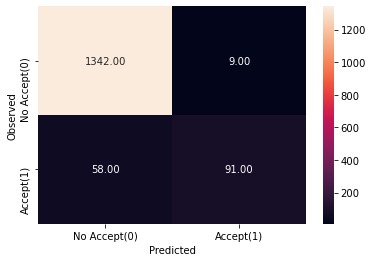

None

Recall is    : 0.610738255033557

Precision is : 0.91

F1 Score is  : 0.7309236947791165

Roc Auc Score: 0.8020382614916121


In [45]:
print("Trainig accuracy is :",logreg.score(X_train,y_train))  
print()
print("Testing accuracy is :",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall is    :",recall_score(y_test,y_predict))
print()
print("Precision is :",precision_score(y_test,y_predict))
print()
print("F1 Score is  :",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [46]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.91      0.61      0.73       149

    accuracy                           0.96      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.96      0.95      1500



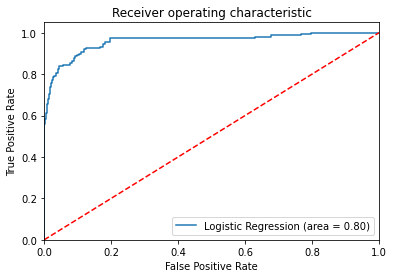

In [47]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 5. Checking Parameters for better performnce of model 

In [48]:
# default model parameters
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 5,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [49]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=5,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.96, 0.96, 0.96, 0.903, 0.9]

[0.958, 0.958, 0.957, 0.889, 0.887]


In [50]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=5,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.961, 0.9]

[0.958, 0.887]


In [51]:
## Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'newton-cg'
# We can proceed by taking anyone out of these two

In [52]:
# Checking model based on CLass_Weight

Class_weight_val= ('balanced', None)

for i in Class_weight_val:
    model = LogisticRegression(random_state=5,penalty='l1',solver='liblinear',class_weight=i) # changing class weight to balanced

    model.fit(X_train, y_train) 

    y_predict = model.predict(X_test)     
    print("Accuracy based on Class_weight : ",i)
    print("Trainig accuracy",model.score(X_train,y_train))  
    print("Testing accuracy",model.score(X_test, y_test))
    print()

Accuracy based on Class_weight :  balanced
Trainig accuracy 0.906
Testing accuracy 0.9086666666666666

Accuracy based on Class_weight :  None
Trainig accuracy 0.9614285714285714
Testing accuracy 0.9586666666666667



## If we change the Class_Weight from 'Balanced' to None then Testing Accuracy Changes
Here it must be taken into account of overfitting the model


In [53]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print('Training Accuracy')
print(train_score)
print('Testing Accuracy')
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]
Training Accuracy
[0.823, 0.906, 0.905, 0.906, 0.906, 0.906]
Testing Accuracy
[0.823, 0.91, 0.909, 0.909, 0.909, 0.909]


Here we have testing accuracy good for value c= 0.5

Trainig accuracy 0.9057142857142857

Testing accuracy 0.9093333333333333

Confusion Matrix


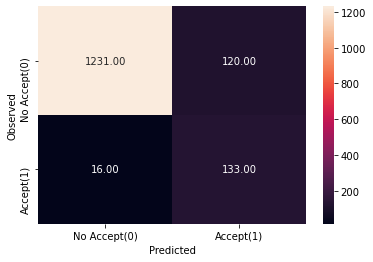

None

Recall: 0.8926174496644296

Precision: 0.525691699604743

F1 Score: 0.6616915422885572

Roc Auc Score: 0.9018971778299942


In [54]:
# Considering All above condition, we decide some parameters for final model
# C= 0.5
# Class_weight= balanced
# Solver = Liblinear

model = LogisticRegression(random_state=5,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

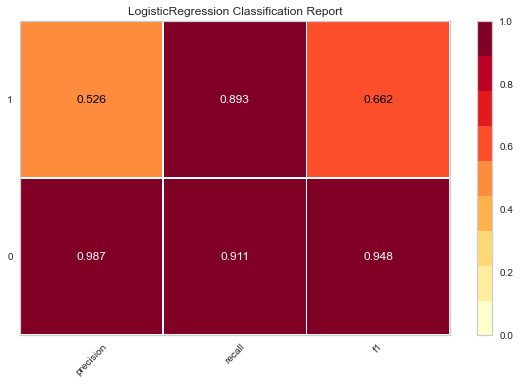

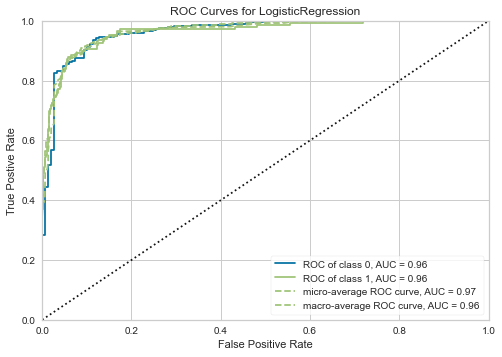

In [55]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

# 6.Business Insights

**Confusion matrix means**

*True Positive (observed=1,predicted=1):*

Predicted that customer has accepted loan and it was True

*False Positive (observed=0,predicted=1):*

Predicted that customer has accepted loan but they didnot accepted

*True Negative (observed=0,predicted=0):*

Predicted that customer has not accpeted loan and they did not 

*False Negative (observed=1,predicted=0):*

Predicted that customer has not accpeted but they accepted



**Business Insight**

Here the bank wants to convert its liability customer into personal loan Customer.
In this case Bank is not going to loose money if more customers does not accept loan.
It means Precision metric is not much important so recall metric is more of importance in this case.

